In [49]:
import os
import cv2 as cv
import dlib
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog

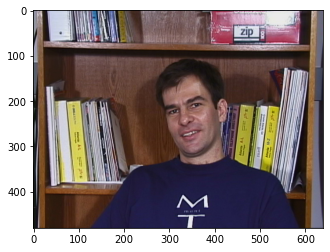

In [50]:
face_path = "Dataset_1/s01/03.jpg"
predictor_path = "shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(predictor_path)
img = dlib.load_rgb_image(face_path)
plt.imshow(img)

In [51]:
detector = dlib.get_frontal_face_detector()
dets = detector(img, 2)
det = dets[0]
img_grayscale = dlib.as_grayscale(img)
shape = predictor(img_grayscale, det)

In [52]:
# win = dlib.image_window()
# win.clear_overlay()
# win.set_image(img)
# win.add_overlay(shape)
# win.add_overlay(det)
# win.wait_until_closed()

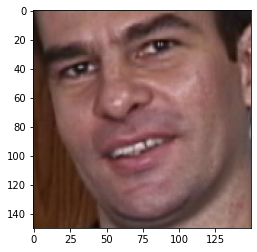

In [53]:
# try to localize face by key points
temp_points = shape.parts()
points = np.ndarray(shape=(0, 2), dtype=np.uint8)
for p in temp_points:
    points = np.vstack([points, [p.x, p.y]])
x_axis, y_axis = points[:, 0], points[:, 1]
left, right = np.min(x_axis), np.max(x_axis)
top, bottom = np.min(y_axis), np.max(y_axis)
crp_img = img[top-5:bottom+5, left-5:right+5]
crp_img = dlib.resize_image(crp_img, 150, 150)
plt.imshow(crp_img)

In [54]:
# try to localize face by face detection
# crp_img = img[det.top():det.bottom(), det.left():det.right()]
# crp_img = dlib.resize_image(crp_img, 150, 150)
# plt.imshow(crp_img)
# plt.show()

In [55]:
shp_det = dlib.rectangle(0, 0, 150, 150)

In [56]:
local_shape = predictor(crp_img, shp_det)
key_points = local_shape.parts()
temp_points = key_points[1:16]
temp_points.extend([key_points[35], key_points[28], key_points[31]])

mask_points = np.ndarray(shape=(0, 2), dtype=np.uint8)
for p in temp_points:
    mask_points = np.vstack([mask_points, [p.x, p.y]])


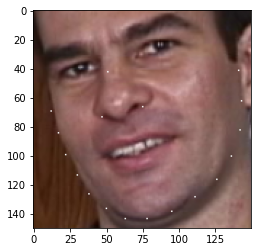

In [57]:
trial_img = np.copy(crp_img)
for p in mask_points:
    trial_img[p[1]-1, p[0]-1] = 255
plt.imshow(trial_img)

In [58]:
cv.fillPoly(crp_img, [mask_points], color=(255, 255, 255))
# cv.fillPoly(crp_img, [mask_points[-3:]], color=(255, 255, 255))
# win = dlib.image_window()
# win.clear_overlay()
# win.set_image(crp_img)
# win.wait_until_closed()

array([[[ 51,  34,  27],
        [ 72,  52,  47],
        [ 86,  63,  58],
        ...,
        [ 34,  28,  30],
        [ 34,  28,  29],
        [ 35,  30,  28]],

       [[ 51,  34,  27],
        [ 69,  49,  43],
        [ 84,  62,  56],
        ...,
        [ 34,  28,  30],
        [ 34,  28,  30],
        [ 33,  28,  25]],

       [[ 49,  32,  25],
        [ 65,  45,  39],
        [ 81,  59,  53],
        ...,
        [ 31,  27,  28],
        [ 31,  27,  28],
        [ 32,  28,  25]],

       ...,

       [[ 75,  41,  17],
        [ 77,  42,  18],
        [ 81,  47,  22],
        ...,
        [154, 117,  98],
        [147, 111,  93],
        [132,  99,  81]],

       [[ 78,  42,  20],
        [ 76,  40,  16],
        [ 80,  44,  20],
        ...,
        [155, 120, 100],
        [147, 112,  92],
        [131,  99,  78]],

       [[ 78,  42,  20],
        [ 75,  39,  15],
        [ 80,  44,  20],
        ...,
        [154, 119,  99],
        [145, 110,  90],
        [133, 101,  80]]

In [59]:
img_hog = hog(crp_img, orientations=8, pixels_per_cell=(10, 10),
                        cells_per_block=(1, 1), visualize=False, multichannel=True)

/var/folders/ff/fctc9rhn1nj_7qtr12s1fg4h0000gn/T/ipykernel_53183/13781147.py:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  img_hog = hog(crp_img, orientations=8, pixels_per_cell=(10, 10),


In [60]:
print(img_hog.size)

1800


In [61]:
import os
nomask_data_path = "output/dataset_nomask"
filename = os.path.join(nomask_data_path, "p1.jpg")
print(crp_img.shape)
plt.imsave(filename, crp_img)

(150, 150, 3)
